In [1]:
import numpy as np
import matplotlib.pyplot as plt
from volatility import blackscholes, mc
import scipy.stats as st 

### Problem 1: Local volatility 

File `data-2_3.txt` conatains call option prices and ivs for different strikes and time to expiration. The following times to expiration grid  $T\in\{0.1,0.15,\dots,0.4\}$ and strikes grid $K\in\{0.65,0.7,\dots,1.35\}$ are used. Initial stock price  is $1$, risk-free rate $r$ is $0$.

$$\sigma(t,s) = \sqrt{v(t,\ln(s/s_0))},$$

$$ v(t,y) = \frac{w'_t}{ 1 - \frac{y}{w} w'_y + \frac14 (-\frac14 - \frac1w + \frac{y^2}{w^2}) (w'_y)^2  +\frac12 w''_{yy}}, $$

$$w(t,y) = \hat\sigma(t, s_0 e^y) t$$

where $ \hat\sigma(\cdot, \cdot)$ is market implied volatility.

Calibrate local volatility model using the formula above. 

In [20]:
from scipy.interpolate import SmoothBivariateSpline

In [13]:
T, K, C, IV = np.loadtxt("data-2_3.txt", skiprows=1, delimiter=",", unpack=True)

In [18]:
w = IV**2 * T

In [21]:
w = SmoothBivariateSpline(T, np.log(K), w)

In [23]:
w_t = w.partial_derivative(dx=1, dy=0)
w_y = w.partial_derivative(dx=0, dy=1)
w_yy = w.partial_derivative(dx=0, dy=2)

In [24]:
v = lambda t,y: w_t(t, y) / (
    1 - y/w(t, y) * w_y(t, y) 
    + 0.25 * (-0.25 - 1/w(t, y) + y**2 / w(t,y)**2) * (w_y(t,y))**2 + 
    + 0.5 * w_yy(t, y))

In [28]:
sigma = lambda t,s: np.sqrt(v(t, np.log(s)))

In [40]:
s = np.linspace(0.5, 2.5, 50)

In [41]:
t_grid = [0.1, 0.15, 0.2, 0.25]

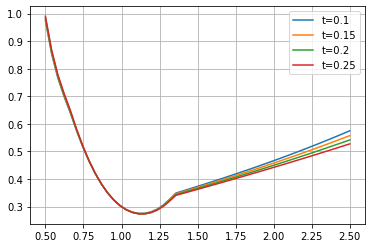

In [42]:
for t in t_grid:
    plt.plot(s, sigma(t, s).squeeze(), label="t={}".format(t))
    
plt.legend()
plt.grid(True)
plt.show()